In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)
#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# 02142021_suppFig9E_kidneyGiniDistribution.ipynb

In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300,
                bbox_inches = 'tight', transparent = True)

In [3]:
thisTiss = "kidney"

In [4]:


tissGini = pd.read_csv("../../signatures_git/gini6_perCluster_kidney_12072020.csv",
sep = ",", index_col = 0)
tissGini.head()

,Connecting tubule-gini,Epithelial progenitor cell-gini,Intercalated cell-gini,Pelvic epithelium-gini,Podocyte-gini,Principal cell-gini,Proximal tubule-gini,Thick ascending limb of Loop of Henle-gini
ENSG00000104327,0.784025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000134873,NaN,0.749093,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000164007,NaN,0.827730,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000147614,NaN,NaN,0.799030,NaN,NaN,NaN,NaN,NaN
ENSG00000151418,NaN,NaN,0.958312,NaN,NaN,NaN,NaN,NaN


In [5]:
# empty df so all ginis are accounted for in the computation
tissGini[tissGini.isna().all(axis=1)] 

,Connecting tubule-gini,Epithelial progenitor cell-gini,Intercalated cell-gini,Pelvic epithelium-gini,Podocyte-gini,Principal cell-gini,Proximal tubule-gini,Thick ascending limb of Loop of Henle-gini


In [6]:
tissTau = pd.read_csv("../gini_tau/" + thisTiss + "_gini_tau_02142021.csv",
                     sep = ",", index_col = 0)

In [7]:
tissTau.head()

,tau-kidney,gini-kidney,RNA tissue specificity,RNA tissue distribution
ENSG00000169344,0.999938,0.983614,Tissue enriched,Detected in single
ENSG00000197891,0.999953,0.983779,Tissue enriched,Detected in single
ENSG00000149452,0.982100,0.945508,Group enriched,Detected in some
ENSG00000164325,0.999947,0.983766,Tissue enriched,Detected in single
ENSG00000204511,0.999845,0.983268,Tissue enriched,Detected in single


In [8]:
fullNames = [i.split("-")[0] for i in tissGini.columns]

In [9]:
tissGini.columns = fullNames

In [10]:
# exported off coolors
#4BA3C3
# 96C9DC
colorVals = {"Y In Mn Blue":"355070","Chinese Violet":"6d597a","Rose Dust":"b56576","Candy Pink":"e56b6f",
          "Tumbleweed":"eaac8b", "Middle Blue": '7EBDC2',
         'Cadet Blue': '729EA1'}

#colorVals = {"Pink Lavender":"cdb4db","Orchid Pink":"ffc8dd",
#             "Nadeshiko Pink":"ffafcc","Uranian Blue":"bde0fe","Baby Blue Eyes":"a2d2ff"}

# add the pound for matplotlib
for c in colorVals:
    colorVals[c] = "#" + colorVals[c]
colors = list(colorVals.values())

sns.color_palette(colors)


[(0.20784313725490197, 0.3137254901960784, 0.4392156862745098),
 (0.42745098039215684, 0.34901960784313724, 0.47843137254901963),
 (0.7098039215686275, 0.396078431372549, 0.4627450980392157),
 (0.8980392156862745, 0.4196078431372549, 0.43529411764705883),
 (0.9176470588235294, 0.6745098039215687, 0.5450980392156862),
 (0.49411764705882355, 0.7411764705882353, 0.7607843137254902),
 (0.4470588235294118, 0.6196078431372549, 0.6313725490196078)]

In [11]:
cell_pal = {}
for i, cell in enumerate(fullNames):
    cell_pal[cell] = colors[i % len(list(colorVals.keys()))]

In [12]:
cell_pal

{'Connecting tubule': '#355070',
 'Epithelial progenitor cell': '#6d597a',
 'Intercalated cell': '#b56576',
 'Pelvic epithelium': '#e56b6f',
 'Podocyte': '#eaac8b',
 'Principal cell': '#7EBDC2',
 'Proximal tubule': '#729EA1',
 'Thick ascending limb of Loop of Henle': '#355070'}

In [13]:
degDict = {}
for i in tissGini:
    degDict[i] = tissGini[i].dropna().index.tolist()
    if len(degDict[i]) < 2: degDict.pop(i)

In [14]:
degTau = {}
for i in degDict:
    relENSG = degDict[i]
    tauVals = tissTau.loc[relENSG]["tau-kidney"].tolist()
    degTau[i] = tauVals

# make a dataframe
tauDF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in degTau.items() ]))

In [15]:
giniMelt = pd.melt(tissGini, value_vars = tissGini.columns)
tauDF = pd.melt(tauDF, value_vars = tauDF.columns)

In [16]:
giniMelt = giniMelt[giniMelt['value'].notna()]

In [17]:
giniMelt = giniMelt[giniMelt["variable"].isin(["Proximal tubule"])]

In [18]:
cell_pal["Proximal tubule"] = "#62b6cb"
cell_pal["Podocyte"] = "#1b4965"

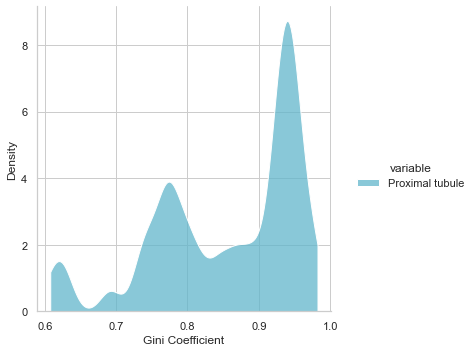

In [19]:
lowerBound = np.min(giniMelt["value"])
upperBound = np.max(giniMelt["value"])


g = sns.displot(giniMelt, x = "value", 
            multiple = "stack",
            kind = "kde",
            bw_adjust=.3,
            clip = (lowerBound, upperBound),
            hue = "variable",
            common_norm = False,
           palette = cell_pal)
g.set(xlabel = "Gini Coefficient", ylabel = "Density")

In [20]:
save_figure_pdf(g, thisTiss + "GiniCoefficient_Distrib_05102021.pdf")

In [21]:
clear all